In [26]:
import numpy as np
import rebound
import glob
import matplotlib.pyplot as plt

In [27]:
dts = [6,12,24]
N = 80
Ns = 500
es = np.zeros((len(dts),N,Ns))
for i, dt in enumerate(dts):
    for j,f in enumerate(glob.glob("/scratch/rein/out_%.1e/*.bin"%dt)):
        sa = rebound.Simulationarchive(f)
        for k in range(min(Ns,len(sa)//10)):
            sim = sa[k*10]
            sim.synchronize()
            es[i,j,k] = sim.particles[1].e
        

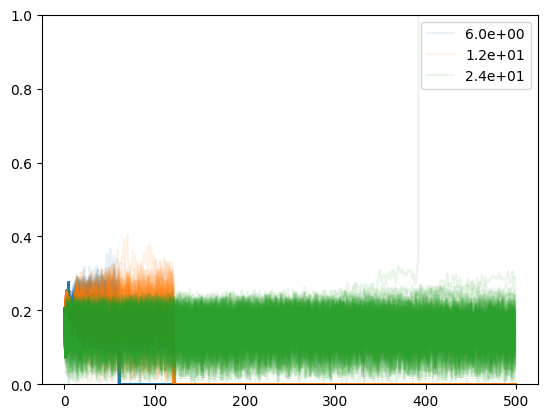

In [28]:
fig, ax = plt.subplots(1,1)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
ax.set_ylim([0,1])
for i, dt in enumerate(dts):
    for j in range(N):
        ax.plot(es[i,j],alpha=0.1,color=colors[i],label=("%.1e"%dt if j==0 else None))
ax.legend()